In [2]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.colors as col
import cv2 as cv
import struct, csv
import pandas as pd
from jupyterthemes import jtplot

In [3]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [4]:
data = []

with open('colortable.act', 'rb') as act:
    for i in range(256):
        raw = act.read(3)
        color = struct.unpack('3B', raw)
        data.append(color)
        
data = (np.array(data)/255)
sunset = col.ListedColormap(data)

In [5]:
df = pd.DataFrame({'red': data.T[0],
                   'green': data.T[1],
                   'blue': data.T[2]})

In [33]:
img = cv.imread('DSC_8805.jpg')

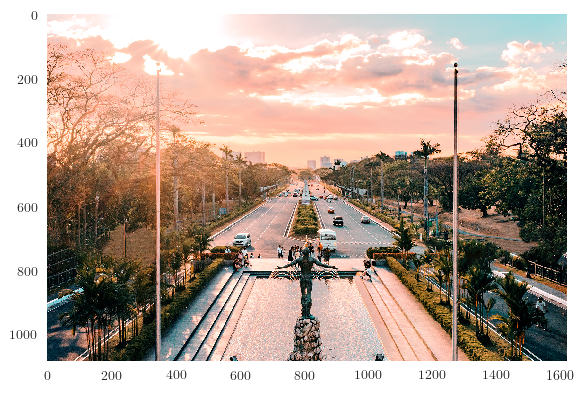

In [34]:
mp.imshow(img[:,:,::-1])
mp.grid(0)
mp.show()

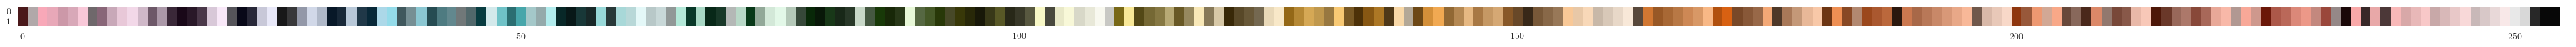

In [8]:
mp.figure(figsize=(50,10))
mp.imshow([np.arange(256), np.arange(256)], cmap=sunset)
mp.grid(0)
mp.show()

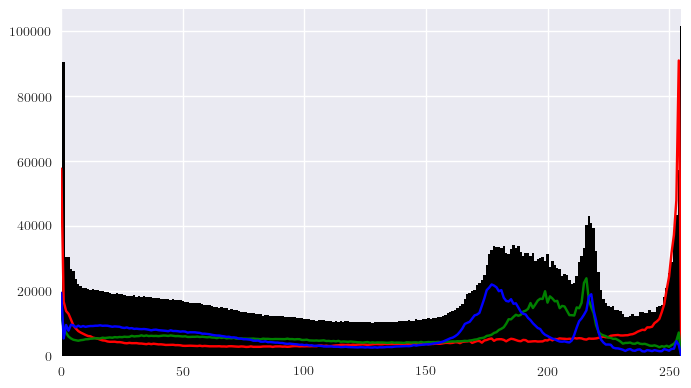

In [41]:
hist_r = np.squeeze(cv.calcHist([img], [2], None, [256], [0, 255]))
hist_g = np.squeeze(cv.calcHist([img], [1], None, [256], [0, 255]))
hist_b = np.squeeze(cv.calcHist([img], [0], None, [256], [0, 255]))
hist = np.squeeze(cv.calcHist([img.ravel()], [0], None, [256], [0, 255]))
mp.bar(range(256), hist, width=1.0, color='k')
mp.plot(range(256), hist_r, 'r-')
mp.plot(range(256), hist_g, 'g-')
mp.plot(range(256), hist_b, 'b-')
mp.xlim(0, 255)
mp.savefig('histogram.png', dpi=300, bbox_inches='tight')
mp.show()